COORELATION

                                Temprature (In degree celcius)  \
Temprature (In degree celcius)                         1.00000   
Number of Ice creams sold                              0.96134   

                                Number of Ice creams sold  
Temprature (In degree celcius)                    0.96134  
Number of Ice creams sold                         1.00000  


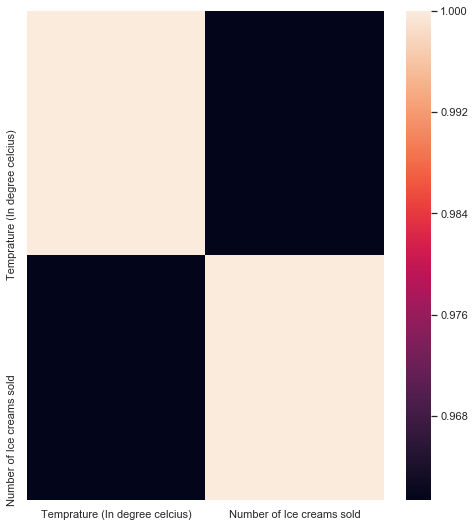


SALES PREDICTION :  [35.23432788 19.89503447 25.51944205 17.84979535 16.31586601 33.18908875]

TRAINING :


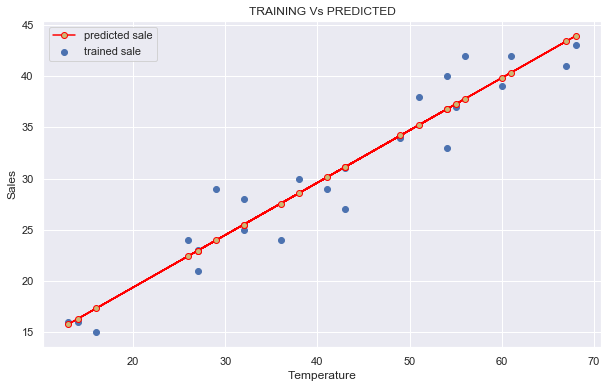


TESTING :


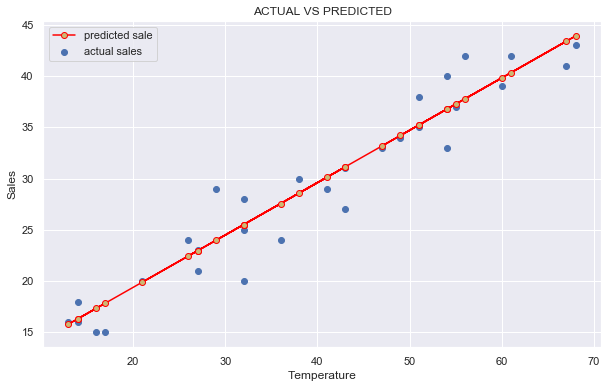


RESIDUAL SCORE :  0.8812


In [3]:
import pandas as pd
import seaborn as s
import matplotlib.pyplot as plt

s.set()

# ----- Data insertion -----
df = pd.read_excel(r"C:\Users\yugal\Desktop\Engineering\Study Material\Non-Acedemics\ittools ML\Sales.xlsx")
sales = df.iloc[:, 1]
temperature = df.iloc[:, 2].values.reshape(-1,1)


print("COORELATION")       
print()
dcorr=df.corr()
print(dcorr)

plt.figure(figsize=(8,9))
s.heatmap(dcorr)
plt.show()


from sklearn.model_selection import train_test_split
temperature_train, temperature_test, sales_train, sales_test = train_test_split(temperature, sales, random_state = 10, test_size = 0.2)

# ----- Fitting the training data on regression -----
from sklearn.linear_model import LinearRegression
r = LinearRegression()
r.fit(temperature_train, sales_train)
print()


# ----- Predicting sales by test data set (using R square value) -----
sales_prediction = r.predict(temperature_test)
print("SALES PREDICTION : ",sales_prediction)
print()


# ----- Visualizing training data set -----
print("TRAINING :")
plt.figure(figsize = (10, 6))
plt.scatter(temperature_train,sales_train,label="trained sale")
plt.plot(temperature_train, r.predict(temperature_train),marker="o",markerfacecolor="y", color = 'red',label="predicted sale")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("TRAINING Vs PREDICTED")
plt.legend()
plt.show()


# ----- Visualizing testing data set -----
print()
print("TESTING :")
plt.figure(figsize = (10, 6))
plt.scatter(temperature,sales,label="actual sales")
plt.plot(temperature, r.predict(temperature),marker="o",markerfacecolor="y", color = 'red',label="predicted sale")
plt.xlabel("Temperature")
plt.ylabel("Sales")
plt.title("ACTUAL VS PREDICTED")
plt.legend()
plt.show()

print()
print("RESIDUAL SCORE : ",round(r.score(temperature_test,sales_test),4))
